<a href="https://colab.research.google.com/github/Millimono/Projet_IA/blob/main/pfe_preatraitement_ROI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -u "/content/sample_data/totalDVD11.zip" -d "/content/sample_data/"

In [6]:
import numpy as np
#import pydicom
import os
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *

In [5]:
import cv2 

In [7]:
data_path = '/content/sample_data/totalDVD11'
output_path = working_path ='/content/sample_data/totalDVD11_output'
g = glob(data_path + '/*.jpg')

In [8]:
# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d  images.\nFirst 5 filenames:" % len(g))
print( '\n'.join(g[:5]) )

Total of 166  images.
First 5 filenames:
/content/sample_data/totalDVD11/0155.jpg
/content/sample_data/totalDVD11/0097.jpg
/content/sample_data/totalDVD11/0207.jpg
/content/sample_data/totalDVD11/0197.jpg
/content/sample_data/totalDVD11/0147.jpg


In [9]:
import cv2
from matplotlib import pyplot
import numpy as np

In [10]:
import glob
cv_img = []
for img in glob.glob("/content/sample_data/totalDVD11/*.jpg"):
    n= cv2.imread(img,0)
    cv_img.append(n)

In [11]:
cv_img[2].shape


(512, 512)

In [12]:
len(cv_img)

166

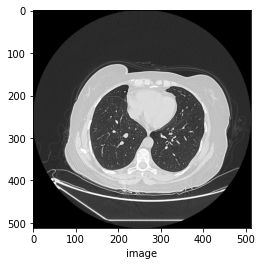

In [13]:
pyplot.imshow(cv_img[5],'gray');
pyplot.xlabel("image")
pyplot.show();

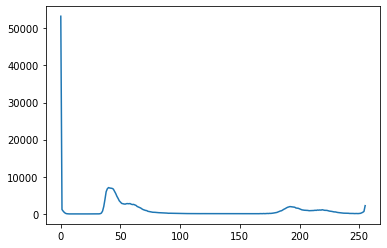

In [14]:
# Calcule l'histogramme de l'image
img_exemple=cv_img[5]
hist = cv2.calcHist([img_exemple], [0], None, [256], [0, 256])
pyplot.plot(hist)
pyplot.show();

# Egliser Les images

**Une seule image en guise d'exemple**

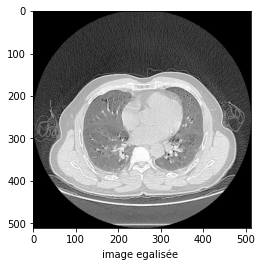

In [ ]:
#egalisation d'une image 
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.equalizeHist(img_exemple)
img_exemple=img1
pyplot.imshow(img_exemple,'gray');
pyplot.xlabel("image egalisée ")
pyplot.show();

**plusieurs Images**

In [ ]:
import glob
img_egal = []
for img in cv_img :
    n = cv2.equalizeHist(img)
    img_egal.append(n)
len(img_egal)

202

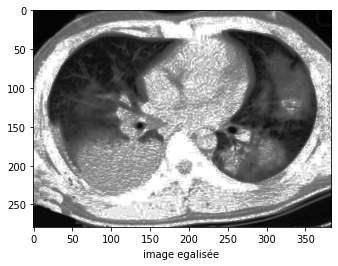

In [ ]:
pyplot.imshow(img_egal[5],'gray');
pyplot.xlabel("image egalisée ")
pyplot.show();

# Binarisation ou Seuillage

**Pour Une Seule Image**

**Methode OTSU**

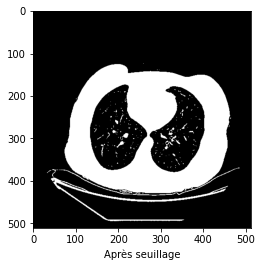

In [15]:
ret2,newImg2 = cv2.threshold(cv_img[5] ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
pyplot.imshow(newImg2,'gray');
pyplot.xlabel("Après seuillage")
pyplot.show();

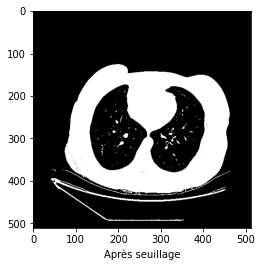

In [16]:
(retVal, newImg) = cv2.threshold(cv_img[5], 156, 255, cv2.THRESH_BINARY)
pyplot.imshow(newImg,'gray');
pyplot.xlabel("Après seuillage")
pyplot.show();

**Pour Plusieurs Images**

In [17]:
import glob
img_Binar = []
for img in cv_img :
    #(retVal, n) = cv2.threshold(img, 156, 255, cv2.THRESH_BINARY)
    (retVal,n) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_Binar.append(n)
len(img_Binar)

166

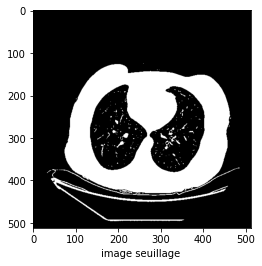

In [18]:
pyplot.imshow(img_Binar[5],'gray');
pyplot.xlabel("image seuillage ")
pyplot.show();

# Remplissage De L'arrière Plan

**Une Seule Image**

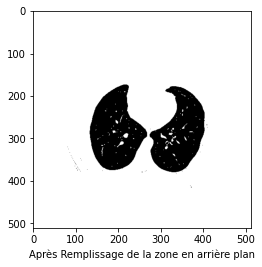

(512, 512)

In [19]:
img=newImg
h, w= img.shape

# create zeros mask 2 pixels larger in each dimension
mask = np.zeros([h + 2, w + 2], np.uint8)

# do floodfill
result2 = img.copy()
cv2.floodFill(result2, mask, (0,0), (255,255,255), flags=8)
#cv2.floodFill(result2, mask, (38,313), (255,255,255), (3,151,65), (3,151,65), flags=8)
#cv2.floodFill(result2, mask, (363,345), (255,255,255), (3,151,65), (3,151,65), flags=8)

# write result to disk
#cv2.imwrite("soccer_floodfill.jpg", result)

# display it
pyplot.imshow(result2, 'gray');
pyplot.xlabel("Après Remplissage de la zone en arrière plan")
pyplot.show();
newImg.shape


**Plusieurs Images**

In [22]:
import glob
img_Arr_p =[]
for img in img_Binar :
    (retVal,n) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    h, w= img.shape
    # create zeros mask 2 pixels larger in each dimension
    mask = np.zeros([h + 2, w + 2], np.uint8)
    # do floodfill
    n = img.copy()
    cv2.floodFill(n, mask, (0,0), (255,255,255), flags=8)
    img_Arr_p.append(n)

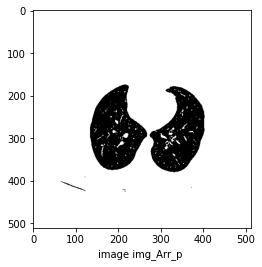

In [23]:
pyplot.imshow(img_Arr_p[5],'gray');
pyplot.xlabel("image img_Arr_p ")
pyplot.show();

# Renverser La couleur

**Pour Une Seule Image**

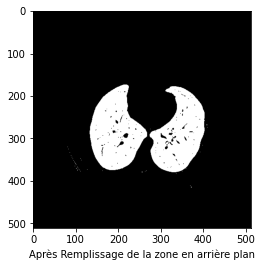

In [24]:
def Vice(pic, name):
    pic = (255 - pic)

    pyplot.imshow(pic, 'gray');
    pyplot.xlabel("Après Remplissage de la zone en arrière plan")
    pyplot.show();
Vice(result2, 'test1.png')

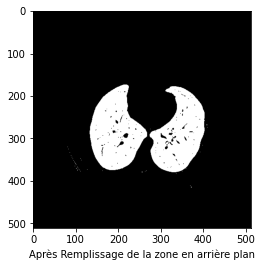

(512, 512)

In [25]:
g=cv2.bitwise_not(result2) 

pyplot.imshow(g, 'gray');
pyplot.xlabel("Après Remplissage de la zone en arrière plan")
pyplot.show();
newImg.shape

**Pour Plusieurs Images**

In [26]:
import glob
img_Coul_In =[]
for img in img_Arr_p :
    n = cv2.bitwise_not(img)
    img_Coul_In.append(n)

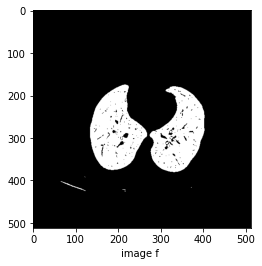

In [27]:
pyplot.imshow(img_Coul_In[5],'gray');
pyplot.xlabel("image f ")
pyplot.show();

# ENCADRER LE ROI

**Pour Une Seule Image**

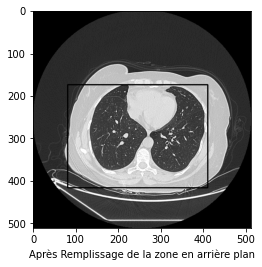

In [28]:
image=cv_img[5]
image_copy = image.copy()

x,y,w,h = cv2.boundingRect(g)
cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,255,0),2)

pyplot.imshow(image_copy, 'gray');
pyplot.xlabel("Après Remplissage de la zone en arrière plan")
pyplot.show();

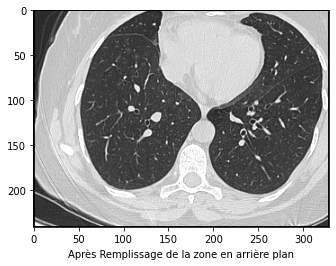

In [29]:
img_decoupe = image_copy[y:y+h,x:x+w]
pyplot.imshow(img_decoupe, 'gray');
pyplot.xlabel("Après Remplissage de la zone en arrière plan")
pyplot.show();

**Pour Plusieurs Images**

In [30]:
import glob
x,y,w,h
n=len(img_Coul_In)
coord = np.zeros((n, 4), dtype = int)
img_Encadre =[]
i=0
for img in img_Coul_In :
    #x,y,w,h = cv2.boundingRect(img)
    coord[i] = cv2.boundingRect(img)
    i=i+1
j=0
for img2 in cv_img :
    x,y,w,h= coord[j]
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
    img_decoupe = img2[y:y+h,x:x+w]
    img_Encadre.append(img_decoupe)
    j=j+1

In [32]:
coord.shape


(166, 4)

In [33]:
x,y,w,h= coord[0]
x

65

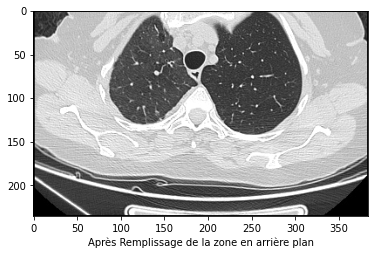

In [34]:
pyplot.imshow(img_Encadre[6], 'gray');
pyplot.xlabel("Après Remplissage de la zone en arrière plan")
pyplot.show();

# Enregistrement

In [35]:
import os
import imageio

Input_Folder = '/content/sample_data/totalDVD11'
Output_Folder = '/content/sample_data/totalDVD11_output'
Input_Image_List = os.listdir(Input_Folder)
i=0
for img in img_Encadre :
        cv2.imwrite(Output_Folder + '/' + 'dvd10'+str(i) + '.jpg', img)
        i=i+1
        #cv2.imwrite('myImage.png', img)
        #imageio.imwrite('pic.png', x[157])
       

In [ ]:
int(223.9)
